<a href="https://colab.research.google.com/github/canbeyz/toyroom/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=d706956b7d380a2678501290ebbb579fd28b5ede24bcadf70b3d020da3508bc5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

#import packages used in this project
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')
import yfinance as yfin
yfin.pdr_override()

#obtain a certain stock historical data (3M for instance)
df = pdr.get_data_yahoo('MMM', start='2000-01-01', end='2021-06-30')

#select 'Close' price column in df as data
data = df.filter(['Close'])
#transfer to array (numbers only)
dataset = data.values
#set training data, say, the first 80% of the sample (no decimals)
train_data_len = math.ceil(len(dataset)*.8)


#Scale the data to [0,1] with MiniMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(dataset)

#create train data
train_data = scaled_dataset[0:train_data_len,:]
x_train = []
y_train = []

#use 50-day rolling basis to forecast
for i in range(50,train_data_len): 
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
#transfer x and y train data to array
x_train, y_train = np.array(x_train), np.array(y_train)
#reshape x train data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#Train
model.fit(x_train, y_train, batch_size=1, epochs=1)

[*********************100%***********************]  1 of 1 completed
4276/4276 [==============================] - 98s 22ms/step - loss: 3.6444e-04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


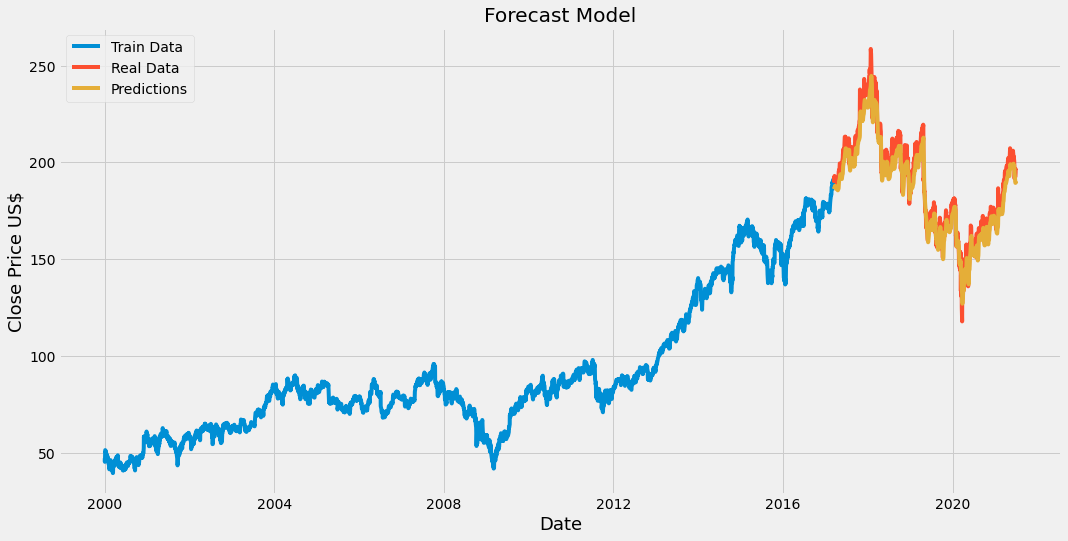

In [ ]:
#create test data
test_data = scaled_dataset[train_data_len-50:, :]
x_test=[]
for i in range(50,len(test_data)):
  x_test.append(test_data[i-50:i,0])

y_test=dataset[train_data_len:, :]

#transfer and reshape x test data
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#Forecast
predictions = model.predict(x_test)
#transfer prediction to normal value
predictions = scaler.inverse_transform(predictions)

#sort values and plot
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Forecast Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price US$', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train Data','Real Data','Predictions'], loc = 'upper left')
plt.show()

In [ ]:
conda list

SyntaxError: ignored